# Movie Dataset Visualization (5000+ Movies)

After realizing that the old movie dataset has only 437 data and after working on it for a week, decided to find a dataset with more data. This dataset has more that 5000 movies information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATA

In [4]:
data = pd.read_csv("/content/IMDb_All_Genres_etf_clean1.csv")

In [5]:
data

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


# DATA EXPLORATION

In [6]:
data.shape

(5562, 10)

Dataset contains 5562 rows and 10 columns.


In [7]:
data.isnull().sum()

Movie_Title      0
Year             0
Director         0
Actors           0
Rating           0
Runtime(Mins)    0
Censor           0
Total_Gross      0
main_genre       0
side_genre       0
dtype: int64

There is no Null Values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [9]:
data.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


Average runtime is 112.22 and Average Rating is 6.7

In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Rating,Runtime(Mins)
Year,1.000000,-0.291711,0.022971
Rating,-0.291711,1.000000,0.323256
Runtime(Mins),0.022971,0.323256,1.000000


Text(0.5, 1.0, 'Count of Movies per Main Genre')

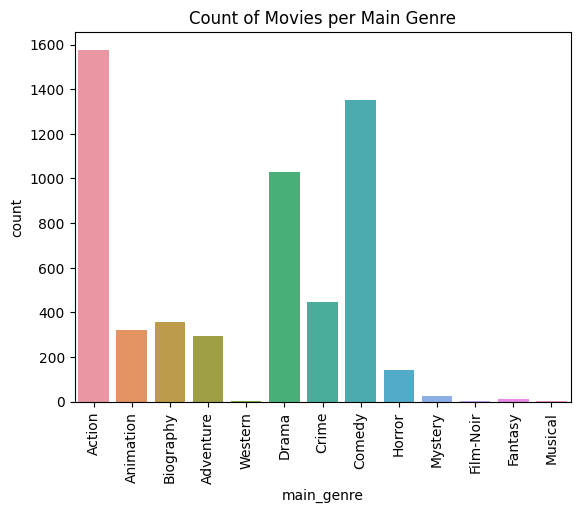

In [11]:
sns.countplot(x = 'main_genre', data = data)

plt.xticks(rotation = 90)
plt.title('Count of Movies per Main Genre')

Most Movies are made in as action as main genre followed by comedy and drama

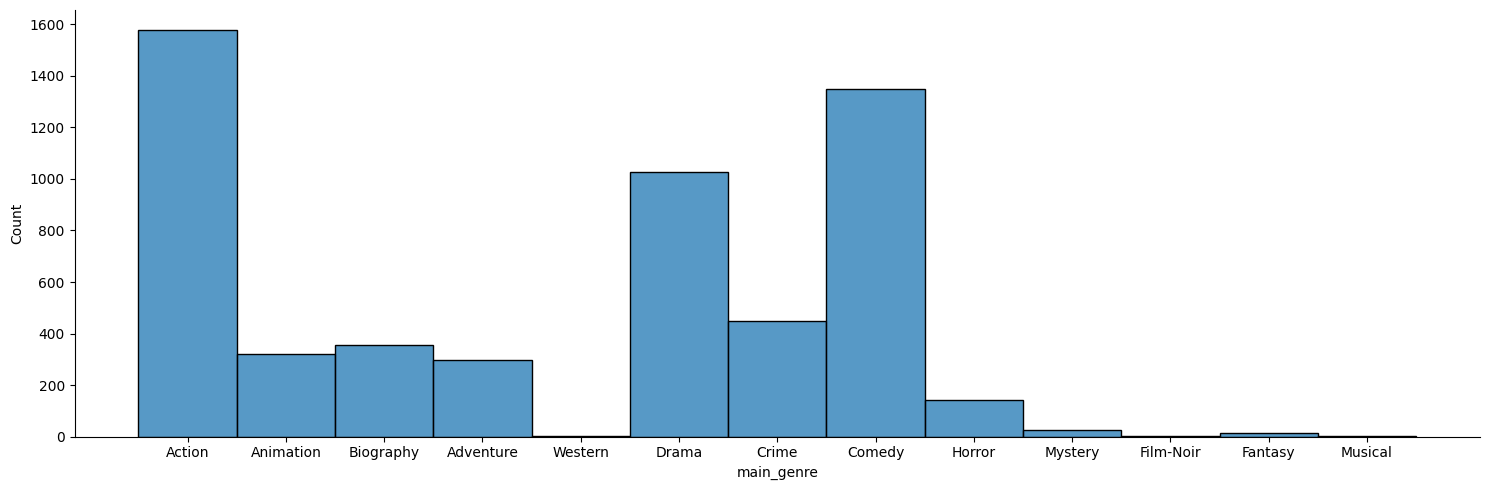

In [32]:
sns.displot(data['main_genre'], aspect = 3);

Text(0.5, 1.0, 'Censor')

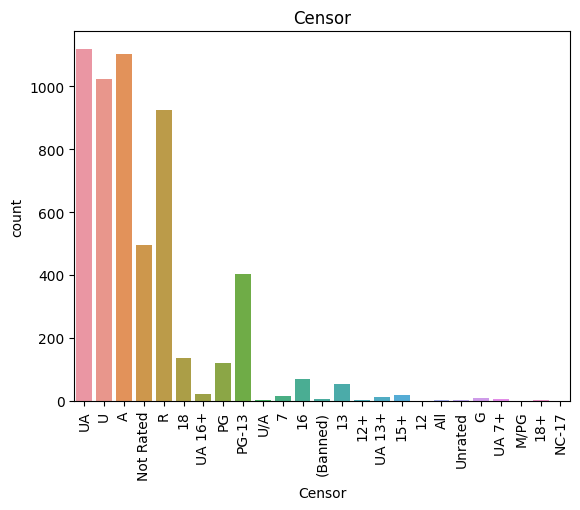

In [13]:
sns.countplot(x = 'Censor', data = data)
plt.xticks(rotation = 90)
plt.title('Censor')

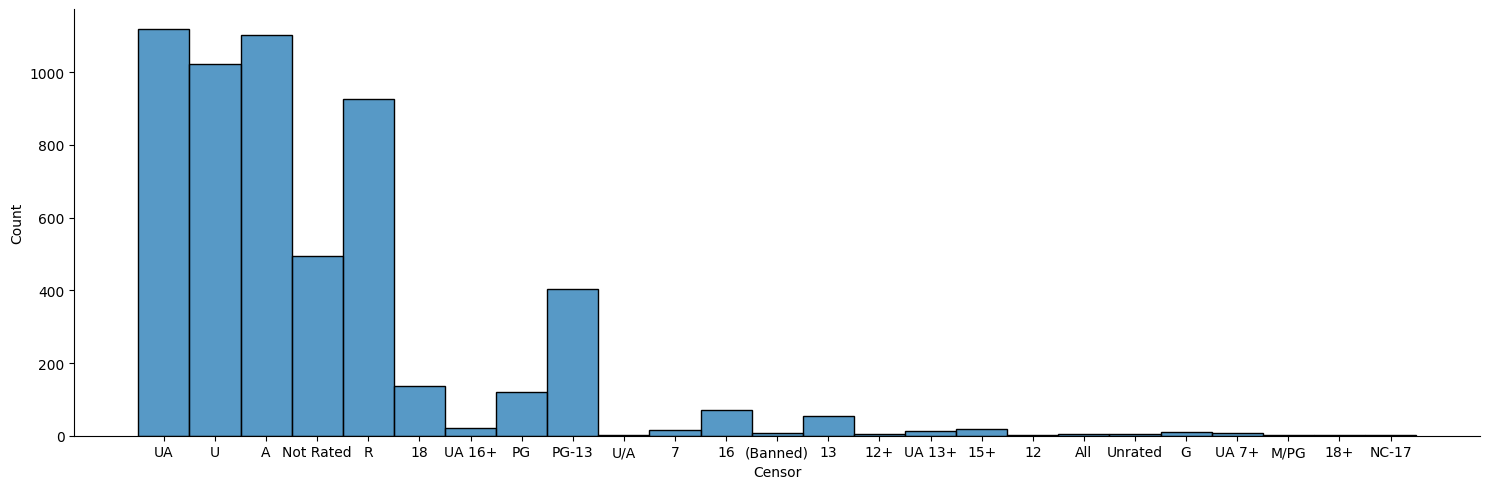

In [33]:
sns.displot(data['Censor'], aspect  = 3);

Most movies are Rated UA followed by A and U

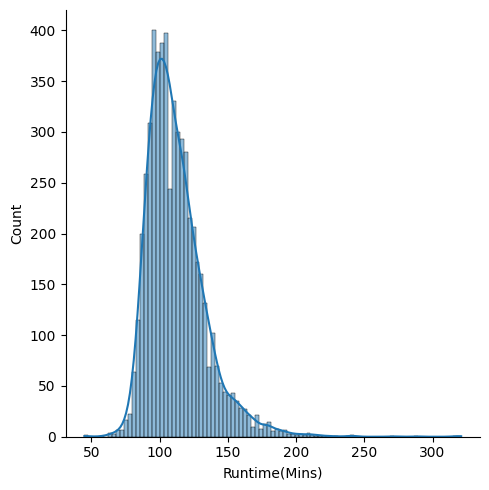

In [16]:
sns.displot(data['Runtime(Mins)'], kde=True);

Most movies have a runtime betweenn 120-150 mins

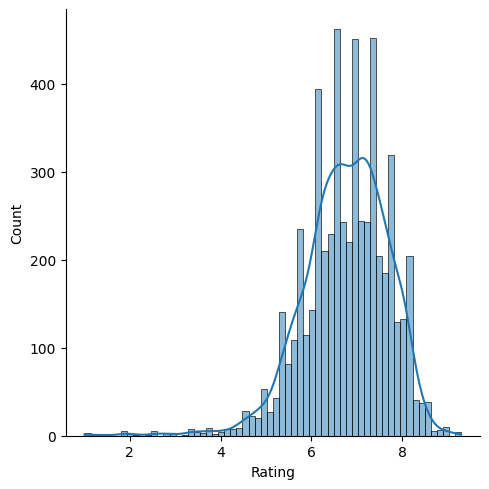

In [18]:
sns.displot(data['Rating'], kde=True);

Most of the movies are rated less than 6

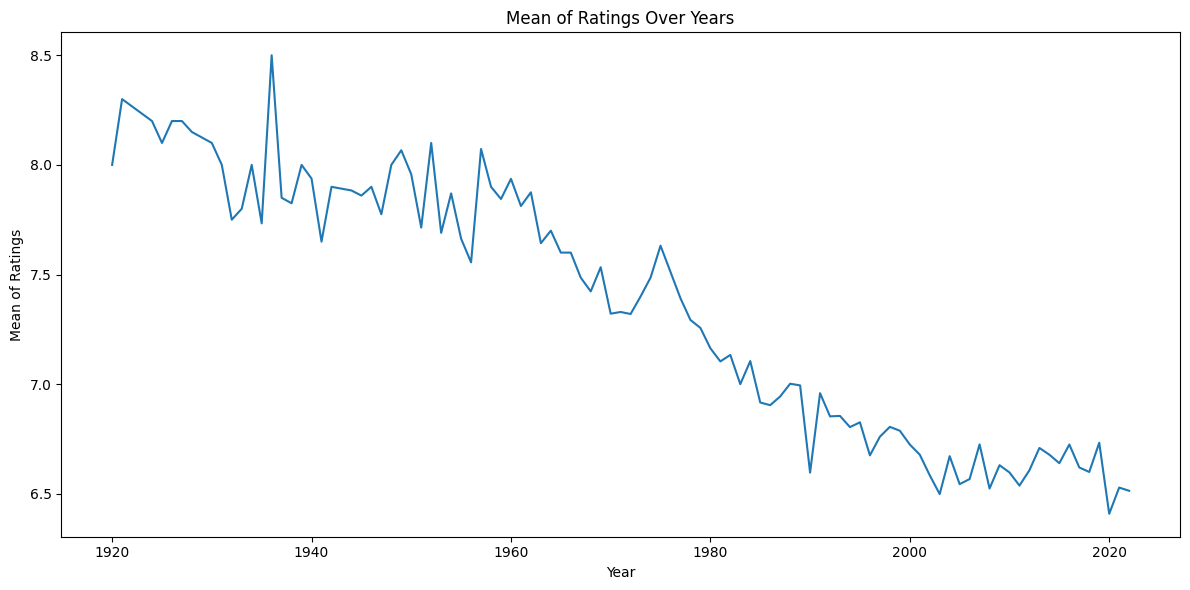

In [19]:
year_rate = data.groupby("Year")["Rating"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=year_rate["Year"],y=year_rate["Rating"])
plt.ylabel("Mean of Ratings")
plt.title("Mean of Ratings Over Years")
plt.tight_layout()

Over the span of time we can see a drop in average ratings of the movie from 8.5-6.5

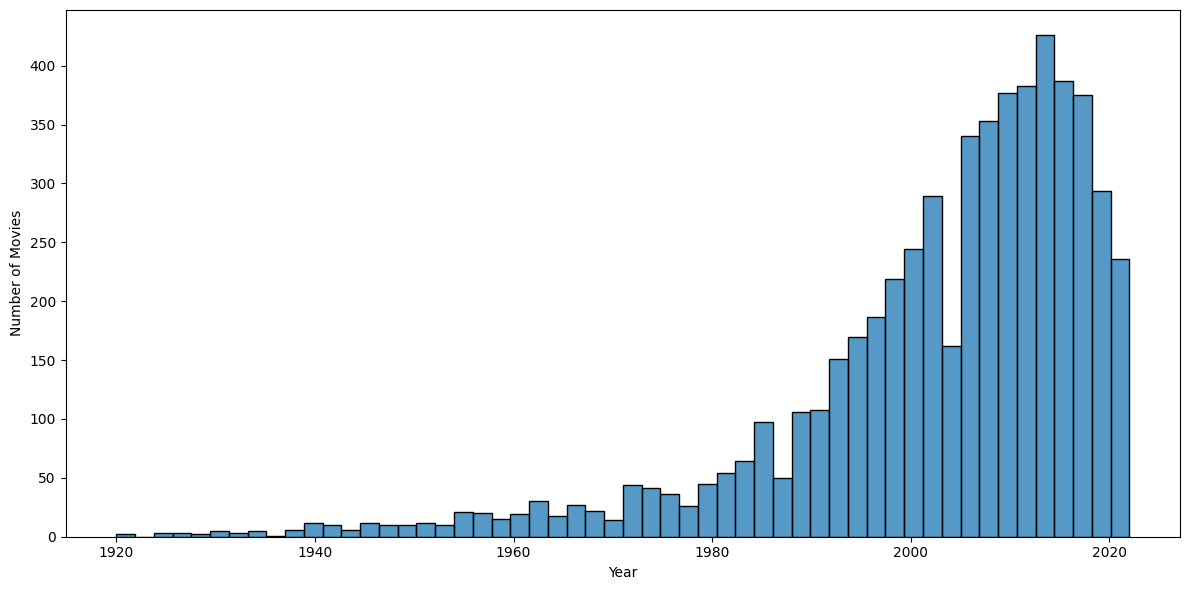

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(x=data['Year'])
plt.ylabel("Number of Movies")
plt.tight_layout()

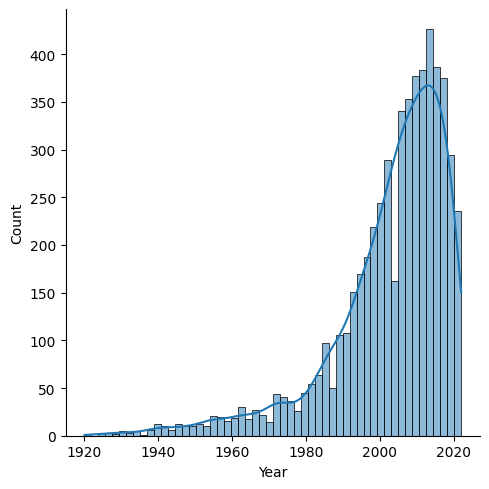

In [21]:
sns.displot(data['Year'], kde=True);

Most of the movies came after the year 1980 as we see a rise in the graph

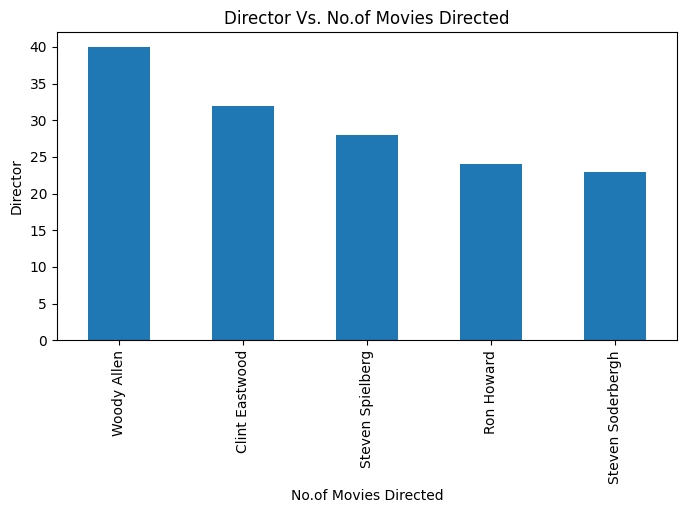

In [22]:
plt.figure(figsize=(8,4))
data['Director'].value_counts()[:5].plot(kind='bar')
plt.xlabel("No.of Movies Directed")
plt.ylabel("Director")
plt.title("Director Vs. No.of Movies Directed")
plt.show();